# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.4.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()
cast.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies:', len(hp_df))
hp_df.head(10)

Total Harry Potter Movies: 8


,title,year
50581,Harry Potter and the Order of the Phoenix,2007
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
109213,Harry Potter and the Half-Blood Prince,2009
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
187926,Harry Potter and the Goblet of Fire,2005
223087,Harry Potter and the Sorcerer's Stone,2001


In [14]:
hp_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [15]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [16]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [17]:
movies[(movies['year'] >= 2000) & (movies['year'] <=2018)]

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014
...,...,...
244899,Poppy Goes to Hollywood,2016
244901,Thomson Villa,2014
244903,A Mero Hajur 2,2017
244906,Yin yang lu shi: Xuan yan zhou,2001


In [18]:
len(movies[(movies['year'] >= 2000) & (movies['year'] <=2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [19]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [20]:
movies[(movies.title == 'Hamlet') & (movies.year >= 2000)].sort_values(by = 'year', ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [21]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [22]:
len(cast[(cast.title=='Inception') & (cast['n'].isnull())])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [23]:
len(cast[(cast.title=='Inception') & (cast['n'].notnull())])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [24]:
cast[(cast.title=='Inception') & (cast['n'].notnull())].sort_values(by='n', ascending=False).head(10)

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [25]:
cast[cast['character'] =='Albus Dumbledore']['title']

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [26]:
cast[cast['character'] =='Albus Dumbledore']['name']

704984            Dane Farwell
792421          Michael Gambon
792423          Michael Gambon
792424          Michael Gambon
947789          Richard Harris
947790          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

In [27]:
cast[cast['character'] =='Albus Dumbledore'].groupby('name')['name'].apply(print)

704984    Dane Farwell
Name: Dane Farwell, dtype: object
1685537    George (X) O'Connor
Name: George (X) O'Connor, dtype: object
792421    Michael Gambon
792423    Michael Gambon
792424    Michael Gambon
Name: Michael Gambon, dtype: object
947789    Richard Harris
947790    Richard Harris
Name: Richard Harris, dtype: object
2248085    Timothy Tedmanson
Name: Timothy Tedmanson, dtype: object


name
Dane Farwell           None
George (X) O'Connor    None
Michael Gambon         None
Richard Harris         None
Timothy Tedmanson      None
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [28]:
len(cast[cast['name'] == 'Keanu Reeves'])

62

In [29]:
cast[(cast['name'] == 'Keanu Reeves') & (cast['year']> 1999) & (cast['n'].notnull())].sort_values(by = 'year', ascending = True)

,title,year,name,type,character,n
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892392,The Matrix Revolutions,2003,Keanu Reeves,actor,Neo,33.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892351,Ellie Parker,2005,Keanu Reeves,actor,Dogstar,21.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [30]:
len(cast[(cast['year'] > 1949) & (cast['year'] <1961)])

234635

In [31]:
len(cast[(cast['year'] > 2006) & (cast['year'] <2018)])

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [32]:
len(cast[(cast['year'] >= 2000) & (cast['n'].notnull())])

1062278

In [33]:
len(cast[(cast['year'] >= 2000) & (cast['n'].isnull())])

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [34]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

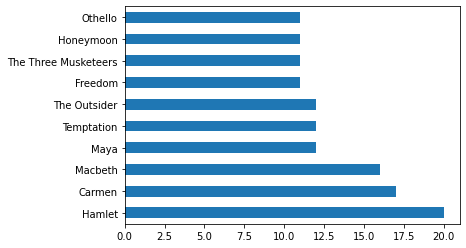

In [35]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [36]:
recentmovies = movies[movies['year'] > 2000]

In [37]:
recentmovies.groupby('year').size().sort_values(ascending=False).head(3)

year
2017    11474
2016     9440
2015     8702
dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [38]:
movies.sort_values(by='year')
# this shows earliest decade is 1890, latest is 2115... I may drop that one


,title,year
156170,Miss Jerry,1894
41687,The Startled Lover,1898
51257,Reproduction of the Corbett and Jeffries Fight,1899
10581,"Pierrot's Problem, or How to Make a Fat Wife O...",1900
177729,Family Troubles (II),1900
...,...,...
184080,Avatar 4,2024
24277,The Dark Room,2024
152082,Avatar 5,2025
94972,The Zero Century: Maetel,2026


                                                 title  year  decade
41687                               The Startled Lover  1898    1890
51257   Reproduction of the Corbett and Jeffries Fight  1899    1890
156170                                      Miss Jerry  1894    1890
127320                                   Yamato zakura  1909    1900
99053                                     La Chicanera  1909    1900
...                                                ...   ...     ...
163873                                         Dag III  2023    2020
179918        Untitled Sony Pictures Animation Project  2020    2020
200864                                Hell for Leather  2020    2020
236992                Untitled Pixar Animation Project  2021    2020
107275                      Legends: II - Earth's Hold  2021    2020

[244913 rows x 3 columns]


<AxesSubplot:>

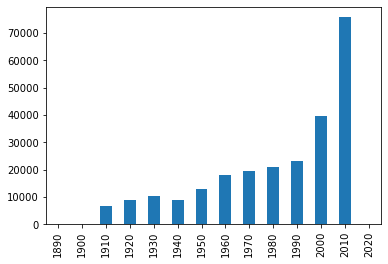

In [99]:
movies = movies[movies['year'] < 2030]
# hint from stack overflow: To get the decade, you can integer-divide the year by 10 and then multiply by 10
movies['decade'] = movies['year']//10 * 10
print(movies.sort_values(by='decade'))

# each movie has a decade. need to count number of movies/decade

movies['decade'].value_counts().sort_index().plot(kind="bar")

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [40]:
top_ten = cast.name.value_counts()[:10]
top_ten

Bess Flowers       835
Herman Hack        702
Sam (II) Harris    667
Lee Phelps         624
Harold Miller      624
Frank O'Connor     613
Franklyn Farnum    570
Tom London         565
Larry Steers       559
Frank Ellis        546
Name: name, dtype: int64

In [41]:
top_ten = cast[cast['character']== 'Herself'].groupby('name').size().sort_values(ascending = False)[:10]
top_ten

name
Queen Elizabeth II        12
Joyce Brothers             9
Luisa Horga                9
Mar?a Luisa (V) Mart?n     9
Hillary Clinton            8
Margaret Thatcher          8
In?s J. Southern           6
Marta Berrocal             6
Oprah Winfrey              6
Marilyn Monroe             6
dtype: int64

In [42]:
top_ten = cast[cast['character']== 'Himself'].groupby('name').size().sort_values(ascending = False)[:10]
top_ten

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [43]:
cast[cast['character'].str.startswith("Zombie")].groupby('character').size().sort_values(ascending=False)[:10]

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
dtype: int64

In [44]:
cast[cast['character'].str.startswith("Police")].groupby('character').size().sort_values(ascending=False)[:10]

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:title={'center':'Number of Roles Keanu Reeves Played by Year'}, xlabel='year', ylabel='num roles'>

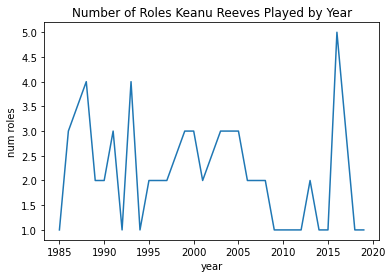

In [45]:
KR = cast[cast['name'] == 'Keanu Reeves'].groupby('year').size()
KR.plot(title = 'Number of Roles Keanu Reeves Played by Year', ylabel ='num roles')


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:title={'center':'Keanu Reeves n-values'}, xlabel='year'>

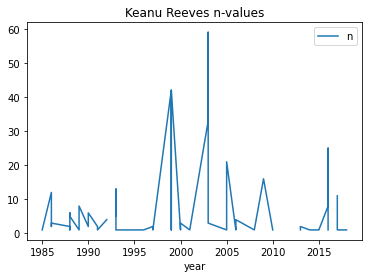

In [46]:
KR = cast[cast['name'] == 'Keanu Reeves'].sort_values(by='year')
KR.plot(title = 'Keanu Reeves n-values', x = 'year', y = 'n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:title={'center':'number Hamlets by decade'}, xlabel='decade', ylabel='number of Hamlets'>

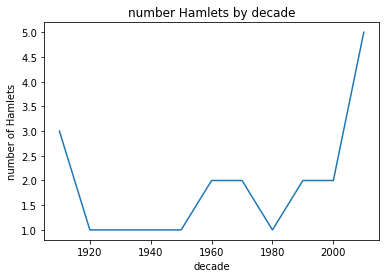

In [47]:
movies[movies.title=='Hamlet'].groupby('decade').size().plot(x = 'decade', ylabel = 'number of Hamlets', title = 'number Hamlets by decade')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [48]:
cast['decade'] = cast['year']//10 * 10
lr60s = cast[(cast['decade']== 1960) & cast['n'].notnull()]
len(lr60s)

131316

In [49]:
lr2000s = cast[(cast['decade']== 2000) & cast['n'].notnull()]

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [108]:

sortedFrank = cast[cast['name']=='Frank Oz'].groupby('title').size()
sortedFrank[sortedFrank.sort_values() > 1]
# this isn't displaying the year!

sortedFrank = cast[cast['name']=='Frank Oz'].groupby(['title', 'year']).size()
# sortedFrank[sortedFrank.values_count() > 1].sort_values()

# have to convert series back to data frame in order to use sort_values
counts = sortedFrank.to_frame('movie_counts')
counts[counts['movie_counts'] > 1].sort_values(by = 'year')

,,movie_counts
title,year,
The Muppet Movie,1979,8
An American Werewolf in London,1981,2
The Great Muppet Caper,1981,6
The Dark Crystal,1982,2
The Muppets Take Manhattan,1984,7
Follow That Bird,1985,3
The Muppet Christmas Carol,1992,7
Muppet Treasure Island,1996,4
Muppets from Space,1999,4


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [109]:
cFrank = cast[cast['name']=='Frank Oz'].groupby('character').size()
cFrank[cFrank.sort_values() > 1]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

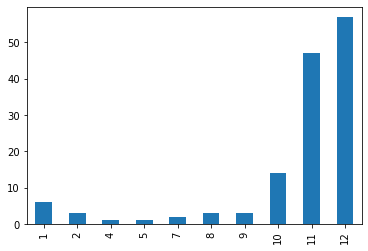

In [52]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

In [58]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 288 to 465517
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    64 non-null     object        
 1   year     64 non-null     int64         
 2   country  64 non-null     object        
 3   date     64 non-null     datetime64[ns]
 4   month    64 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ KB


<ipython-input-114-cb8c364e99d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['month'] = summer['date'].dt.month


''

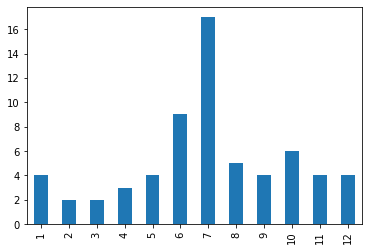

In [114]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
# I think I need to make a month released column, since I'm not actually trying to sort by date
summer['month'] = summer['date'].dt.month
summer.info()
summer['month'].value_counts().sort_index().plot(kind = 'bar')
;

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

In [62]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [64]:
 KR.head()

,title,year,name,type,character,n
1892373,One Step Away,1985,Keanu Reeves,actor,Ron Petrie,1.0
1892403,Youngblood,1986,Keanu Reeves,actor,Heaver,12.0
1892377,River's Edge,1986,Keanu Reeves,actor,Matt,2.0
1892355,Flying,1986,Keanu Reeves,actor,Tommy Warneki,3.0
1892395,The Prince of Pennsylvania,1988,Keanu Reeves,actor,Rupert Marshetta,2.0


In [71]:
KRUSA = release_dates[release_dates['country']== 'USA'].merge(KR, on = ['title', 'year'])
# remove non leading roles (could also take n above a threshold)
KRUSA = KRUSA [KRUSA['n'].notnull()]
KRUSA

,title,year,country,date,name,type,character,n
0,47 Ronin,2013,USA,2013-12-25,Keanu Reeves,actor,Kai,1.0
1,A Scanner Darkly,2006,USA,2006-07-28,Keanu Reeves,actor,Bob Arctor,4.0
2,A Walk in the Clouds,1995,USA,1995-08-11,Keanu Reeves,actor,Paul Sutton,1.0
3,Bill & Ted's Bogus Journey,1991,USA,1991-07-19,Keanu Reeves,actor,Ted,1.0
4,Bill & Ted's Excellent Adventure,1989,USA,1989-02-17,Keanu Reeves,actor,Ted,1.0
5,Chain Reaction,1996,USA,1996-08-02,Keanu Reeves,actor,Eddie Kasalivich,1.0
6,Constantine,2005,USA,2005-02-18,Keanu Reeves,actor,John Constantine,1.0
7,Dangerous Liaisons,1988,USA,1989-02-24,Keanu Reeves,actor,Chevalier Danceny,5.0
8,Dracula,1992,USA,1992-11-13,Keanu Reeves,actor,Jonathan Harker,4.0
9,Even Cowgirls Get the Blues,1993,USA,1994-05-20,Keanu Reeves,actor,Julian Gitche,5.0


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

In [92]:
KRUSA['month'] = KRUSA['date'].dt.month



In [93]:
KRUSA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 46
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      45 non-null     object        
 1   year       45 non-null     int64         
 2   country    45 non-null     object        
 3   date       45 non-null     datetime64[ns]
 4   name       45 non-null     object        
 5   type       45 non-null     object        
 6   character  45 non-null     object        
 7   n          45 non-null     float64       
 8   month      45 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 3.5+ KB


<AxesSubplot:>

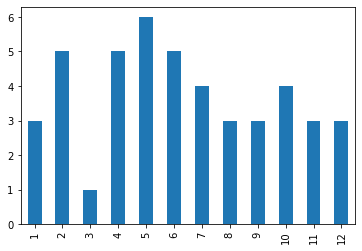

In [96]:
KRUSA['month'].value_counts().sort_index().plot(kind="bar")

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [83]:
IMK = cast[cast['name'] == 'Ian McKellen']
IMK_rel_USA = release_dates[release_dates['country']== 'USA'].merge(IMK, on = ['title', 'year'])
IMK_rel_USA.sort_values(by = 'year')

,title,year,country,date,name,type,character,n,decade
12,Priest of Love,1981,USA,1981-10-11,Ian McKellen,actor,D.H. Lawrence,1.0,1980
25,The Keep,1983,USA,1983-12-16,Ian McKellen,actor,Dr. Theodore Cuza,6.0,1980
11,Plenty,1985,USA,1985-09-20,Ian McKellen,actor,Sir Andrew Charleson,45.0,1980
15,Scandal,1989,USA,1989-04-28,Ian McKellen,actor,John Profumo,4.0,1980
16,Six Degrees of Separation,1993,USA,1993-12-08,Ian McKellen,actor,Geoffrey,4.0,1990
9,Last Action Hero,1993,USA,1993-06-18,Ian McKellen,actor,Death,11.0,1990
19,The Ballad of Little Jo,1993,USA,1993-08-20,Ian McKellen,actor,Percy Corcoran,3.0,1990
7,I'll Do Anything,1994,USA,1994-02-04,Ian McKellen,actor,John Earl McAlpine,11.0,1990
31,To Die For,1994,USA,1994-12-02,Ian McKellen,actor,Quilt Documentary Narrator,6.0,1990
29,The Shadow,1994,USA,1994-07-01,Ian McKellen,actor,Reinhardt Lane,5.0,1990


<AxesSubplot:>

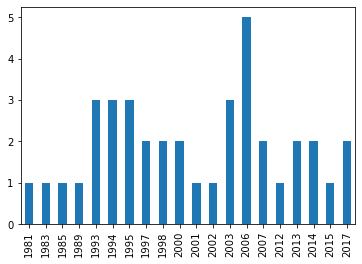

In [97]:

IMK_rel_USA['year'].value_counts().sort_index().plot.bar()